<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/spam_detection_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget /content/lastfm-dataset-1K.tar.gz

/content/lastfm-dataset-1K.tar.gz: Scheme missing.


In [10]:
!tar --gunzip --extractv --verbose --file=/content/lastfm-dataset-1K.tar.gz

tar: unrecognized option '--extractv'
Try 'tar --help' or 'tar --usage' for more information.


In [11]:
#!tar --help

**tokenization**


In [12]:
import nltk

In [13]:
#to use tokenization we need to download 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# line tokenization

In [14]:
import nltk
from nltk.tokenize import word_tokenize
data="welcome to great learning"
a=nltk.sent_tokenize(data)
print(a)

['welcome to great learning']


# word tokenization

In [15]:

a=nltk.word_tokenize(data)
print(a)
print(len(a))

['welcome', 'to', 'great', 'learning']
4


# stemming


In [16]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
words=['like','willing','watching']
for i in words:
  print(i,":",ps.stem(i))

like : like
willing : will
watching : watch


# lemmatization

uses morphologic analysis

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
print('sales :',lm.lemmatize('sales'))

sales : sale


# stop words

In [19]:
from nltk.corpus import stopwords


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:

data="There are lots of similar issues on the web related to undefined symbol lookup errors, but none of them explains how to deal with the error."
a=set(stopwords.words("english"))

In [22]:
print(stopwords.words()[620:680])#total stop words in english

['your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at']


In [23]:
#to see the no.of stop words in my data we need to tokenize first
data=nltk.word_tokenize(data)

In [24]:
print(data)

['There', 'are', 'lots', 'of', 'similar', 'issues', 'on', 'the', 'web', 'related', 'to', 'undefined', 'symbol', 'lookup', 'errors', ',', 'but', 'none', 'of', 'them', 'explains', 'how', 'to', 'deal', 'with', 'the', 'error', '.']


In [25]:
stop_word=set(stopwords.words('english'))


In [26]:
print("the stop words in my data:")
for word in data:
  
  if word in stop_word:
    
    print(word)


the stop words in my data:
are
of
on
the
to
but
of
them
how
to
with
the


*SPAM DETECTION*

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
spam_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data sets/spam.csv",encoding='latin-1')

spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
spam_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [30]:
spam_df = spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_df = spam_df.rename(columns={"v1":"label", "v2":"sms"})
spam_df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
spam_df.shape

(5572, 2)

In [32]:
spam_df['label'].value_counts()
# or     spam_df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

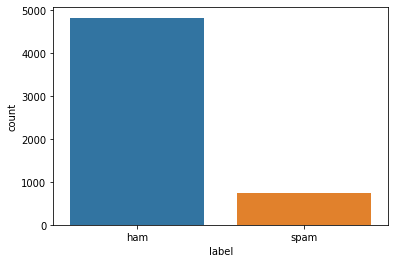

In [33]:
sns.countplot(x='label', data=spam_df)

# word cloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

# word cloud for spam text

In [35]:
df = spam_df.loc[spam_df['label']=='spam', :]

df.head()

,label,sms
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [36]:
df.count()

label    747
sms      747
dtype: int64

In [37]:
df.label.value_counts()

spam    747
Name: label, dtype: int64

In [38]:
words = ' '.join(df['sms'])

print(words[:100])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr


In [39]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

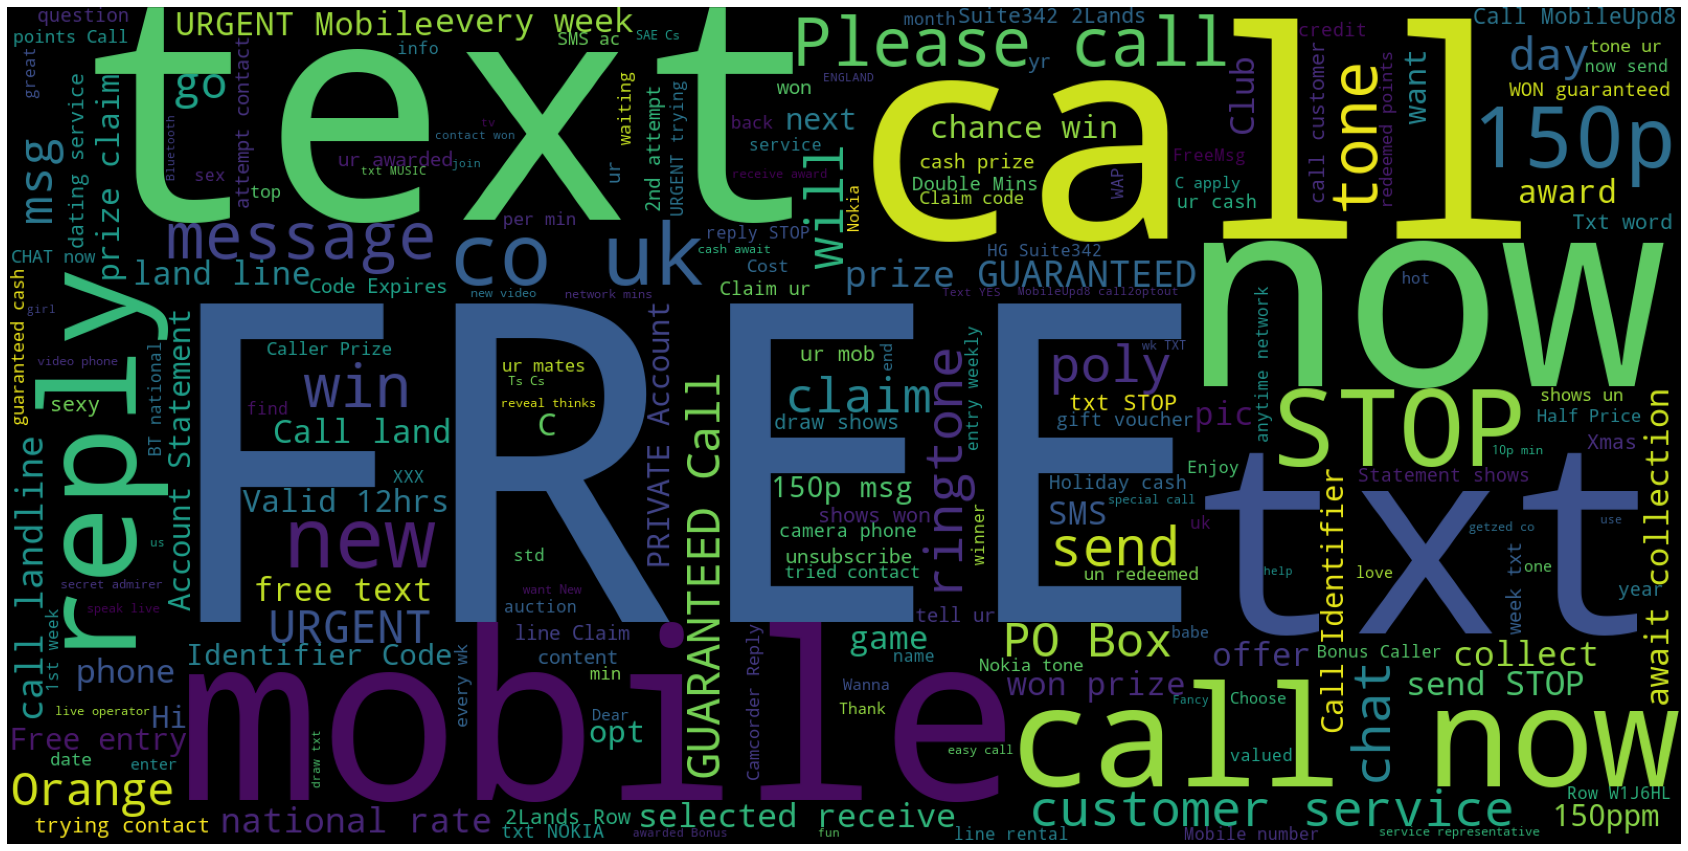

In [40]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# word cloud for ham text

In [41]:
df = spam_df.loc[spam_df['label']=='ham', :]

df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [42]:
words = ' '.join(df['sms'])

print(words[:200])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I do


In [43]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

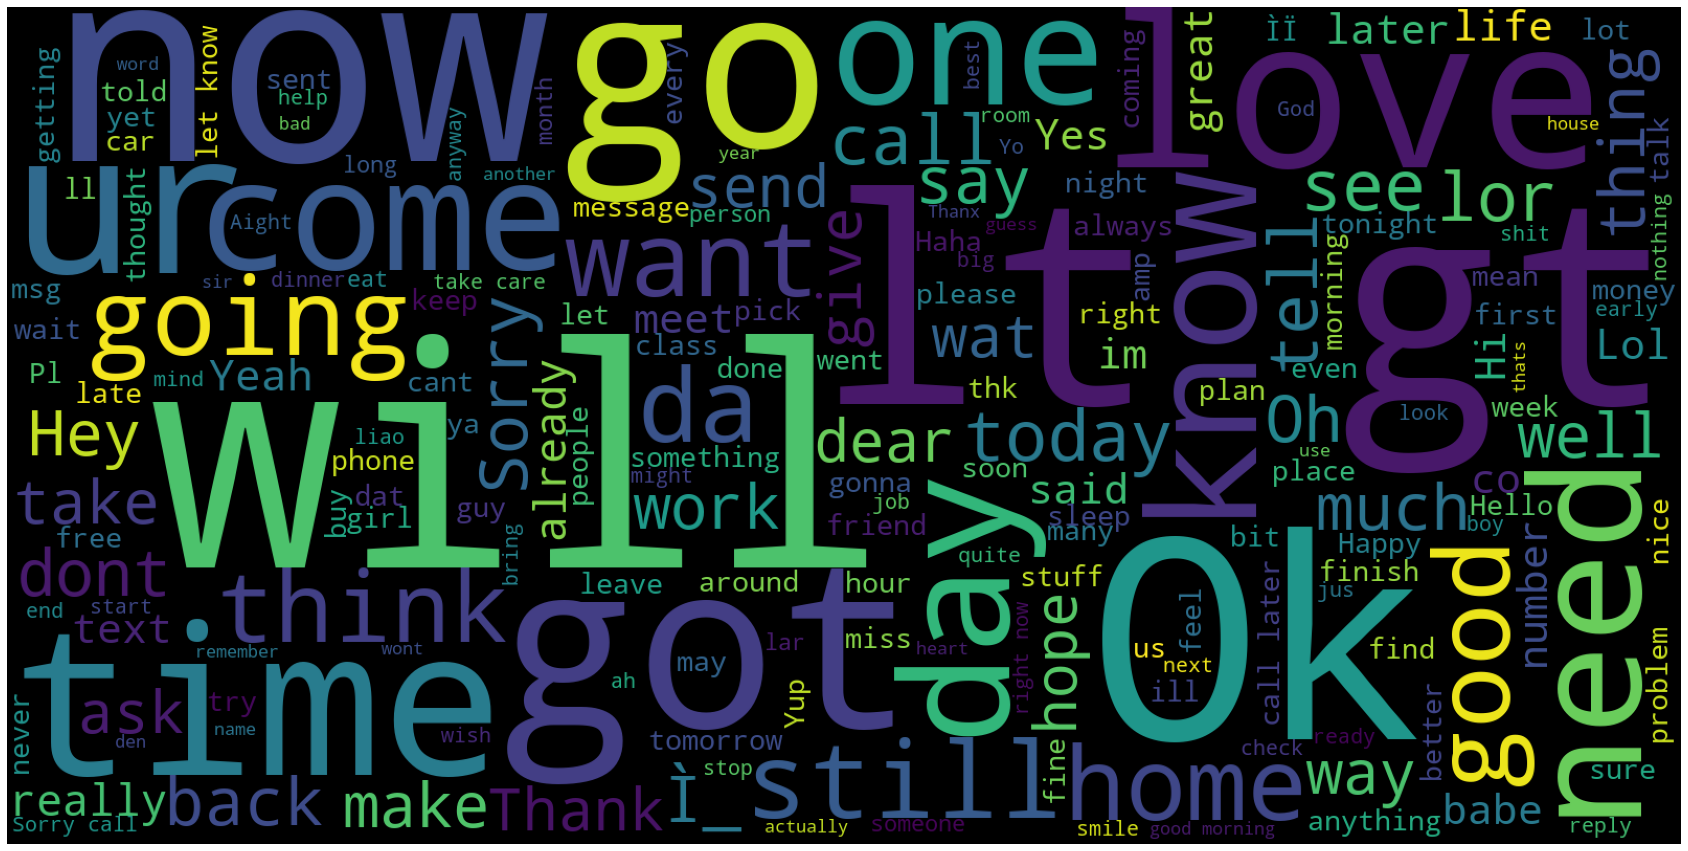

In [44]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#DATA PREPROCESSING
Preprocessing steps:

Removing special characters


Convert sentence into lower case


Remove Stop Words


Stemming or Lemmatization

In [45]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [46]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [47]:
clean_spam_lst = []

spam_len_lst = []

In [48]:
def preprocess(raw_sms, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sms)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_spam_lst.append(" ".join(words))
    
    spam_len_lst.append(len(words))

In [49]:
 !pip install tqdm

In [50]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [51]:
from wordcloud import STOPWORDS

print(STOPWORDS)

{"isn't", 'the', 'who', 'me', 'after', 'get', "here's", 'of', 'shall', 'as', 'only', 'until', 'where', 'hers', 'these', 'some', "he'll", 'off', "there's", 'both', 'than', 'those', 'were', "they'd", 'am', 'nor', 'he', 'being', 'at', 'are', "she'd", 'other', 'www', 'below', 'over', 'yourselves', "didn't", "don't", 'there', 'him', 'his', 'between', 'have', 'does', 'then', "i've", 'http', "we'd", "who's", 'them', 'r', 'with', 'whom', 'for', 'would', "how's", 'to', 'ourselves', 'few', 'any', "you'd", "shan't", "doesn't", "let's", 'their', 'while', "what's", 'was', "mustn't", 'here', "you'll", "when's", 'out', 'be', 'since', "it's", 'why', "aren't", 'had', 'com', "you've", "i'm", 'cannot', 'same', "hadn't", "she's", 'doing', 'but', 'most', 'once', 'such', "won't", "we'll", "you're", 'how', 'under', 'which', 'yours', 'your', 'ever', 'own', 'himself', 'very', 'each', 'on', "i'd", "they'll", 'what', 'about', 'if', 'down', 'should', 'again', "can't", 'can', "haven't", 'did', 'up', 'her', "i'll",

In [52]:
import nltk
nltk.download('stopwords')

clean_spam_lst = []

spam_len_lst = []

spam_df['sms'].progress_apply(lambda x: preprocess(x, 'lemma'))

spam_df['clean_spam_lema'] = clean_spam_lst

spam_df['spam_length_lema'] = spam_len_lst

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


100%|██████████| 5572/5572 [00:12<00:00, 455.27it/s]


In [53]:
spam_df.head()

,label,sms,clean_spam_lema,spam_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


In [54]:
# Preparing the target variable

spam_df['result']=spam_df['label'].apply(lambda x: 0 if x=='ham' else 1)

spam_df.head()

,label,sms,clean_spam_lema,spam_length_lema,result
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7,0


In [55]:
spam_df.result.value_counts()

0    4825
1     747
Name: result, dtype: int64

In [56]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(spam_df,test_size=0.2,random_state=42)

In [57]:
train_clean_spam=[]
for spam in train['clean_spam_lema']:
    train_clean_spam.append(spam)

test_clean_spam=[]
for spam in test['clean_spam_lema']:
    test_clean_spam.append(spam)

# Bag of words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
vectorizer = CountVectorizer(ngram_range=(1,2))
#transformed train reviews
train_features = vectorizer.fit_transform(train_clean_spam)
#transformed test reviews
test_features = vectorizer.transform(test_clean_spam)

In [59]:
print('BOW_train:',train_features.shape)
print('BOW_test:',test_features.shape)

BOW_train: (4457, 30917)
BOW_test: (1115, 30917)


In [60]:
vocab=vectorizer.get_feature_names()#toget feature names

In [61]:
print(vocab)

['aa', 'aa exhaust', 'aah', 'aah bless', 'aah cuddle', 'aah speak', 'aaniye', 'aaniye pudunga', 'aaooooright', 'aaooooright work', 'aathi', 'aathi love', 'ab', 'ab sara', 'abbey', 'abbey happy', 'abeg', 'abeg make', 'abel', 'aberdeen', 'aberdeen united', 'abi', 'abi hw', 'abi saying', 'ability', 'ability listen', 'ability question', 'abiola', 'abj', 'able', 'able anything', 'able atten', 'able come', 'able deliver', 'able dont', 'able eat', 'able friday', 'able get', 'able give', 'able go', 'able join', 'able kid', 'able late', 'able met', 'able pay', 'able raise', 'able reply', 'able show', 'able text', 'abnormally', 'abnormally call', 'aboutas', 'aboutas much', 'abroad', 'abroad lonely', 'absolutly', 'absolutly fine', 'abstract', 'abstract still', 'abt', 'abt abt', 'abt already', 'abt character', 'abt dvg', 'abt event', 'abt function', 'abt half', 'abt leona', 'abt making', 'abt mei', 'abt muz', 'abt tat', 'abt tel', 'abt tht', 'abt trip', 'abt ur', 'abt whr', 'abta', 'abta complimen

In [62]:
vectorizer.vocabulary_

{'boat': 2591,
 'still': 24703,
 'mom': 16727,
 'check': 4017,
 'yo': 30756,
 'half': 11180,
 'naked': 17360,
 'boat still': 2593,
 'still mom': 24764,
 'mom check': 16730,
 'check yo': 4044,
 'yo half': 30769,
 'half naked': 11189,
 'bank': 1948,
 'granite': 10697,
 'issue': 13013,
 'strong': 24966,
 'buy': 3130,
 'explosive': 7918,
 'pick': 19684,
 'member': 16153,
 'nasdaq': 17414,
 'symbol': 25413,
 'cdgt': 3806,
 'per': 19445,
 'bank granite': 1956,
 'granite issue': 10698,
 'issue strong': 13017,
 'strong buy': 24968,
 'buy explosive': 3141,
 'explosive pick': 7919,
 'pick member': 19701,
 'member nasdaq': 16155,
 'nasdaq symbol': 17415,
 'symbol cdgt': 25414,
 'cdgt per': 3807,
 'giving': 9916,
 'second': 22595,
 'chance': 3873,
 'rahul': 20975,
 'dengra': 6134,
 'giving second': 9921,
 'second chance': 22598,
 'chance rahul': 3880,
 'rahul dengra': 20976,
 'played': 19919,
 'smash': 23797,
 'bros': 2943,
 'lt': 15325,
 'gt': 10826,
 'religiously': 21467,
 'played smash': 19922,

# TF_IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf vectorizer
tf=TfidfVectorizer(ngram_range=(1,2))
#transformed train reviews
tf_train=tf.fit_transform(train_clean_spam)
#transformed test reviews
tf_test=tf.transform(test_clean_spam)
print('Tfidf_train:',tf_train.shape)
print('Tfidf_test:',tf_test.shape)

Tfidf_train: (4457, 30917)
Tfidf_test: (1115, 30917)


# Model Building and Evaluation

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [65]:
#fitting model for bag-of-words/count vectorization
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=2),
    RandomForestClassifier(n_estimators=200)
]

In [66]:

for classifier in Classifiers:
    model = classifier.fit(train_features,train['result'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['result'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy)) 

Accuracy of LogisticRegression is 0.9766816143497757
Accuracy of DecisionTreeClassifier is 0.9721973094170404
Accuracy of RandomForestClassifier is 0.9713004484304932


In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),MultinomialNB()
    
]

In [68]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['result'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['result'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9766816143497757
Accuracy of DecisionTreeClassifier is 0.9704035874439462
Accuracy of MultinomialNB is 0.9820627802690582


In [69]:
model = GaussianNB()

In [70]:
a=train_features.toarray()
model.fit(a,train['result'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
b=test_features.toarray()
pred = model.predict(b)

In [72]:
accuracy = accuracy_score(pred,test['result'])
print('Accuracy of GaussianNB is',accuracy)

Accuracy of GaussianNB is 0.9165919282511211


In [73]:
#Fitting the model for tfidf features
logistic=LogisticRegression()
lr_tfidf=logistic.fit(train_features,train['result'])
print(lr_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [74]:
lr_tfidf_predict=logistic.predict(test_features)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]


In [75]:
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test['result'],lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.9766816143497757


# Saving the Model and Vectorizer in Pickle

In [76]:
model = LogisticRegression()
model.fit(train_features,train['result'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
import pickle

In [78]:
pickle.dump(vectorizer, open('countvectorizer.pkl', 'wb'))

In [80]:
pickle_out=open("sample.pkl","wb")
pickle.dump(model,pickle_out)
loaded_model=pickle.load(open("sample.pkl","rb"))
rst=loaded_model.score(train_features,train['result'])

In [81]:
rst#the score of my saved model

0.9986538030065066

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [83]:
def preprocess(raw_sms):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sms)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [84]:
def predict(sms):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = pickle.load(open('countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = pickle.load(open('sample.pkl', 'rb'))
    
    # Preprocessing the sms
    clean_sms = preprocess(sms)
    
    # Converting text to numerical vector
    clean_sms_encoded = vectorizer.transform([clean_sms])
    
    # Prediction
    prediction = classifier.predict(clean_sms_encoded)
    
    return prediction

In [85]:
sms = input("Enter a message to check : ")

prediction = predict(sms)

print(prediction)

Enter a message to check : how are you
[0]


In [86]:
if(prediction == 0):
    print("message is not spam")
else:
    print("message is spam")

message is not spam


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a=[97.66,97.21,98.20,91.65]
algorithms=['logisticRegression','DecisionTreeClassifier','MultinomialNB','GaussianNB']

plt.pie(a, labels = algorithms)
plt.legend()
plt.show()

In [ ]:
plt.barh(algorithms,a,color='g')
plt.show()